In [1]:
import os
dir = os.getcwd()
dir

import pandas as pd
csv_name = 'csv_agileoutgoing_C_London'

csv_list = 'csv_agileoutgoing_C_London.csv'

csv_path = os.path.join(dir, 'data',csv_list)
csv_name= pd.read_csv(csv_path)


In [2]:
csv_agileoutgoing_C_London = pd.read_csv(os.path.join(dir, 'data',csv_list))

In [3]:
column_names=['date_time', 'time', 'Letter', 'City', 'Price']
csv_agileoutgoing_C_London.columns = column_names
csv_agileoutgoing_C_London.head()

,date_time,time,Letter,City,Price
0,2019-05-15 23:30:00+00:00,00:30,C,London,4.24
1,2019-05-16 00:00:00+00:00,01:00,C,London,4.24
2,2019-05-16 00:30:00+00:00,01:30,C,London,4.24
3,2019-05-16 01:00:00+00:00,02:00,C,London,4.24
4,2019-05-16 01:30:00+00:00,02:30,C,London,4.24


In [4]:
csv_agileoutgoing_C_London.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84671 entries, 0 to 84670
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date_time  84671 non-null  object 
 1   time       84671 non-null  object 
 2   Letter     84671 non-null  object 
 3   City       84671 non-null  object 
 4   Price      84671 non-null  float64
dtypes: float64(1), object(4)
memory usage: 3.2+ MB


In [5]:
df_agileoutgoing_C_London = pd.DataFrame(csv_agileoutgoing_C_London[['date_time', 'Price']])
df_agileoutgoing_C_London.columns = ['ds', 'y']
df_agileoutgoing_C_London.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84671 entries, 0 to 84670
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ds      84671 non-null  object 
 1   y       84671 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.3+ MB


In [6]:
df_agileoutgoing_C_London['ds'] = df_agileoutgoing_C_London['ds'].str.slice(stop=-6)

In [7]:
# Assuming 'ds' column has timezone information
# df_agileoutgoing_C_London['ds'] = df_agileoutgoing_C_London['ds'].dt.tz_localize(None)

# Now, convert 'ds' column to datetime without timezone
df_agileoutgoing_C_London['ds'] = pd.to_datetime(df_agileoutgoing_C_London['ds'], format='%Y-%m-%d %H:%M:%S')

In [8]:
df_agileoutgoing_C_London.head()

,ds,y
0,2019-05-15 23:30:00,4.24
1,2019-05-16 00:00:00,4.24
2,2019-05-16 00:30:00,4.24
3,2019-05-16 01:00:00,4.24
4,2019-05-16 01:30:00,4.24


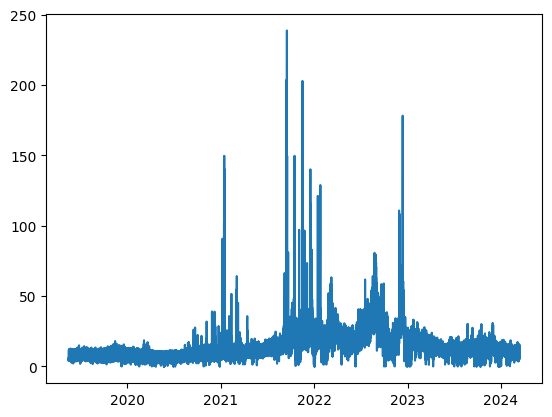

In [9]:
import matplotlib.pyplot as plt

plt.plot(df_agileoutgoing_C_London['ds'], df_agileoutgoing_C_London['y'])
plt.show()

In [36]:
df = df_agileoutgoing_C_London#[df_agileoutgoing_C_London['ds']>'2022-01-01 00:00:00']

In [37]:
from datetime import timedelta

start_date = str(df['ds'][df.index[-1]] - timedelta(days=6*30))
end_date = str(df['ds'][df.index[-1]])
start_date, end_date

('2023-09-15 22:30:00', '2024-03-13 22:30:00')

In [38]:
df_test = df[(df['ds']>start_date) & (df['ds']<= end_date)]
df.shape, df_test.shape

((84671, 2), (8640, 2))

In [39]:
df.head()

,ds,y
0,2019-05-15 23:30:00,4.24
1,2019-05-16 00:00:00,4.24
2,2019-05-16 00:30:00,4.24
3,2019-05-16 01:00:00,4.24
4,2019-05-16 01:30:00,4.24


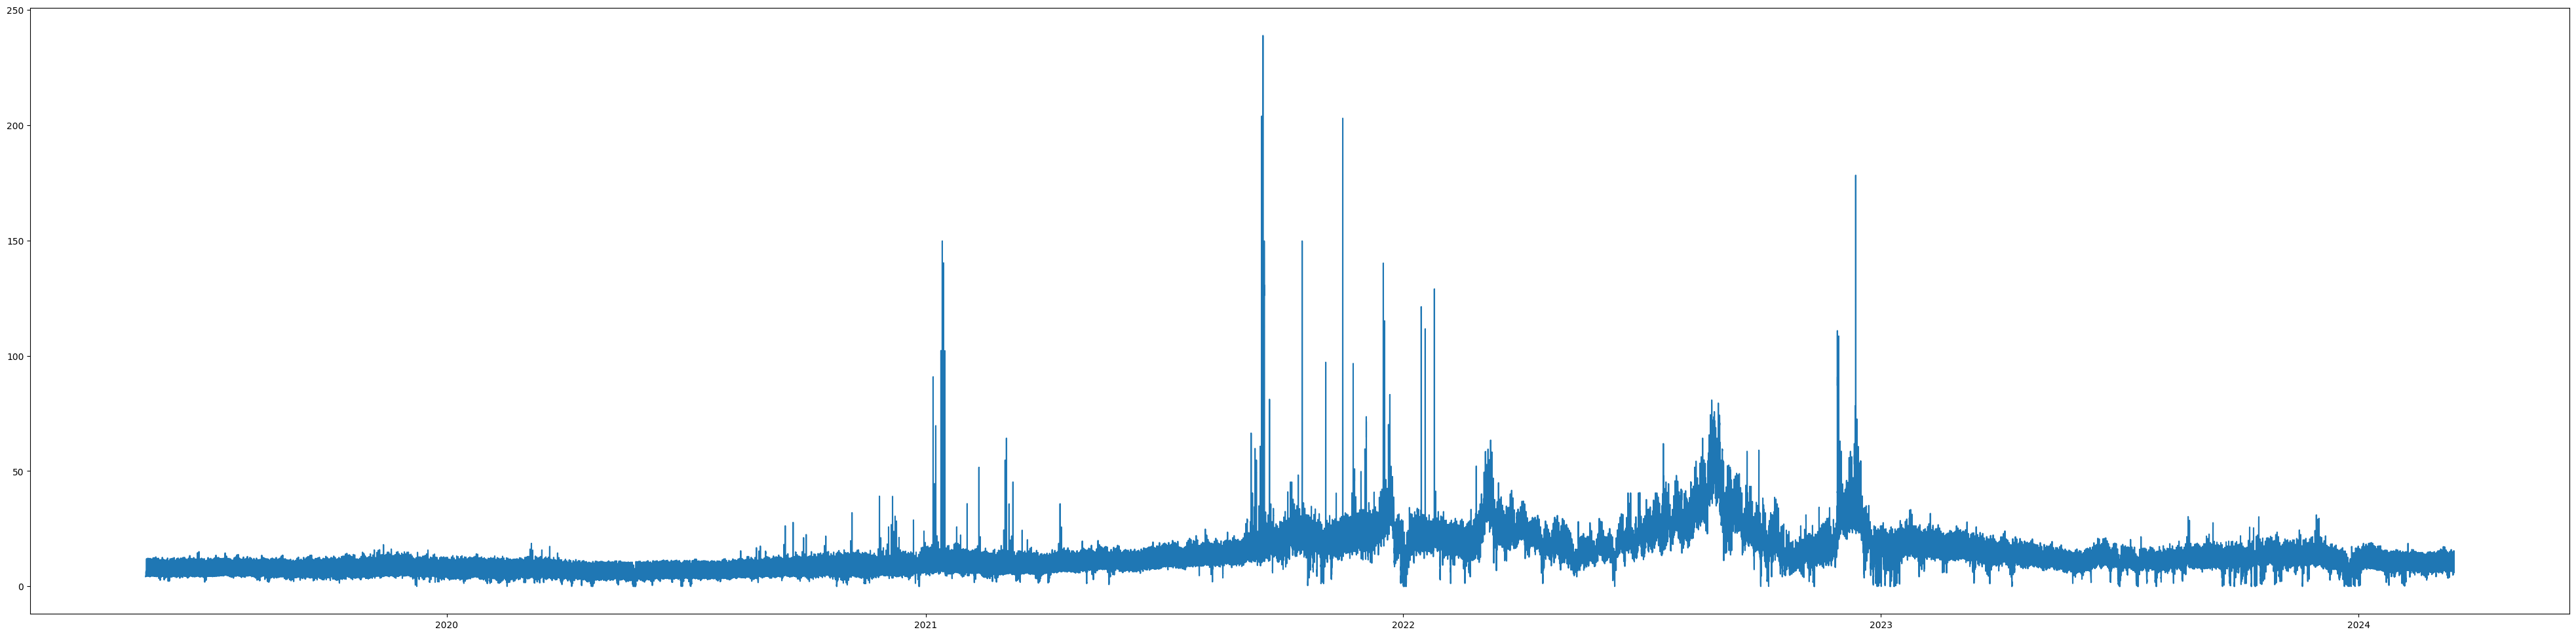

In [40]:
plt.figure(figsize=(50,12))
plt.plot(df['ds'], df['y'])
plt.show()

In [41]:
df['ds'][:10]

0   2019-05-15 23:30:00
1   2019-05-16 00:00:00
2   2019-05-16 00:30:00
3   2019-05-16 01:00:00
4   2019-05-16 01:30:00
5   2019-05-16 02:00:00
6   2019-05-16 02:30:00
7   2019-05-16 03:00:00
8   2019-05-16 03:30:00
9   2019-05-16 04:00:00
Name: ds, dtype: datetime64[ns]

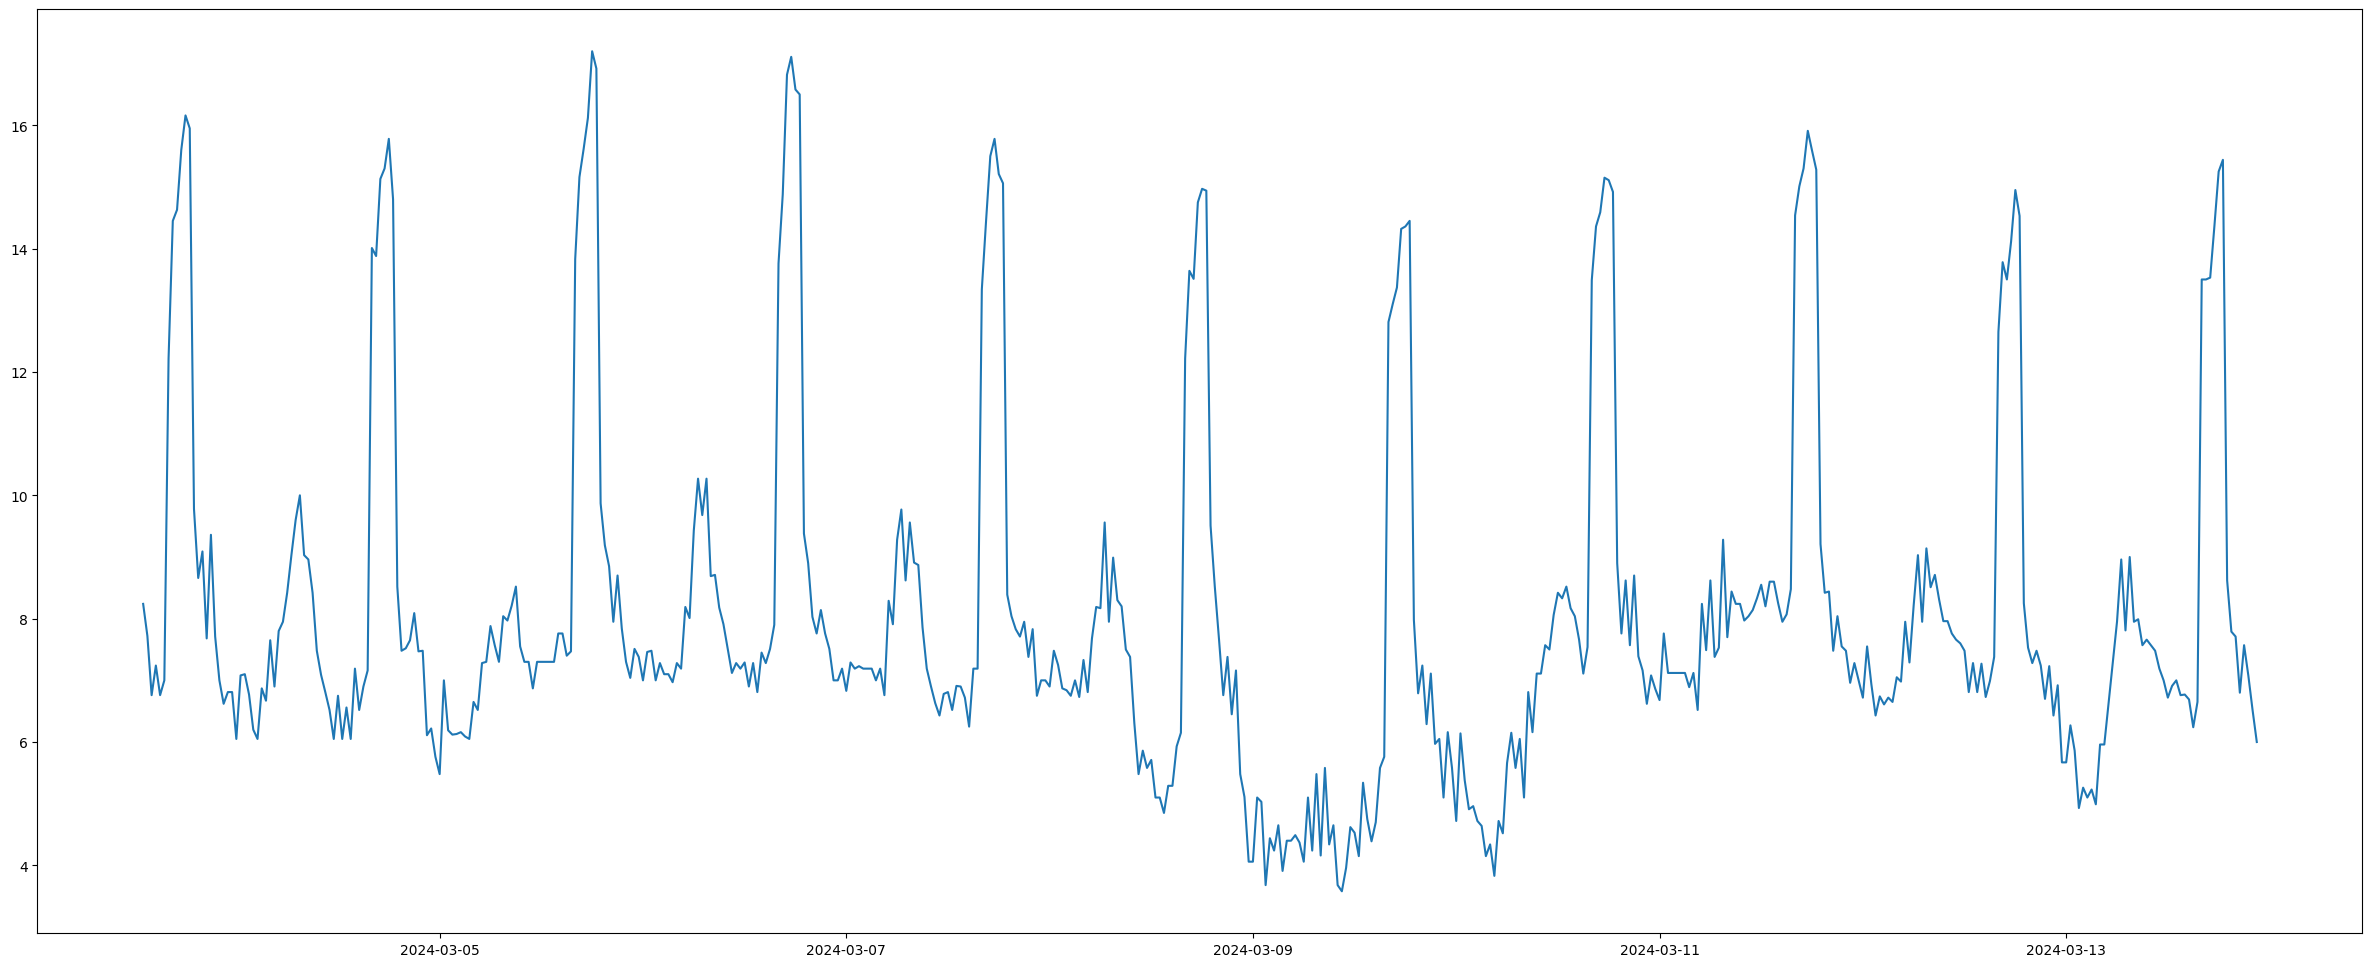

In [42]:
plt.figure(figsize=(30,12))
plt.plot(df['ds'][-500:], df['y'][-500:])
plt.show()

In [43]:
import numpy as np

In [44]:
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics
from prophet.plot import plot_cross_validation_metric

In [45]:
split_ratio = round(df.shape[0]*0.9)
split_ratio, df.shape

(76204, (84671, 2))

In [46]:
train = df.iloc[:split_ratio]
test = df.iloc[split_ratio:]

check = len(train)+len(test)
check

84671

In [47]:
train['ds'][train.index[0]] - train['ds'][train.index[-1]]
# train['ds'][0]#- train['ds'][len(train)-1]

Timedelta('-1588 days +10:30:00')

In [48]:
model = Prophet(seasonality_mode='multiplicative', yearly_seasonality=4, changepoint_range=0.8, interval_width=0.95)
model.fit(train)

17:50:56 - cmdstanpy - INFO - Chain [1] start processing
17:51:26 - cmdstanpy - INFO - Chain [1] done processing


In [49]:
horizon = 24*270

future = model.make_future_dataframe(periods = horizon, freq='30min')

In [50]:
forecast = model.predict(future)

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
82679,2024-02-01 11:00:00,1.345714,-36.758167,37.699144
82680,2024-02-01 11:30:00,1.272415,-34.516157,38.337656
82681,2024-02-01 12:00:00,1.200849,-32.682397,35.164342
82682,2024-02-01 12:30:00,1.150611,-31.964124,34.609610
82683,2024-02-01 13:00:00,1.142075,-32.011169,33.961315


In [51]:
model2 = Prophet()
model2.fit(train)

17:52:31 - cmdstanpy - INFO - Chain [1] start processing
17:53:31 - cmdstanpy - INFO - Chain [1] done processing


In [52]:
horizon = 24*270

future2 = model2.make_future_dataframe(periods = horizon, freq='30min')

forecast2 = model2.predict(future2)

forecast2[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
82679,2024-02-01 11:00:00,22.452796,-24.393856,68.632534
82680,2024-02-01 11:30:00,21.808395,-25.183417,68.389657
82681,2024-02-01 12:00:00,21.177252,-25.075805,68.517226
82682,2024-02-01 12:30:00,20.742812,-25.605150,68.260745
82683,2024-02-01 13:00:00,20.689626,-27.019686,67.270574


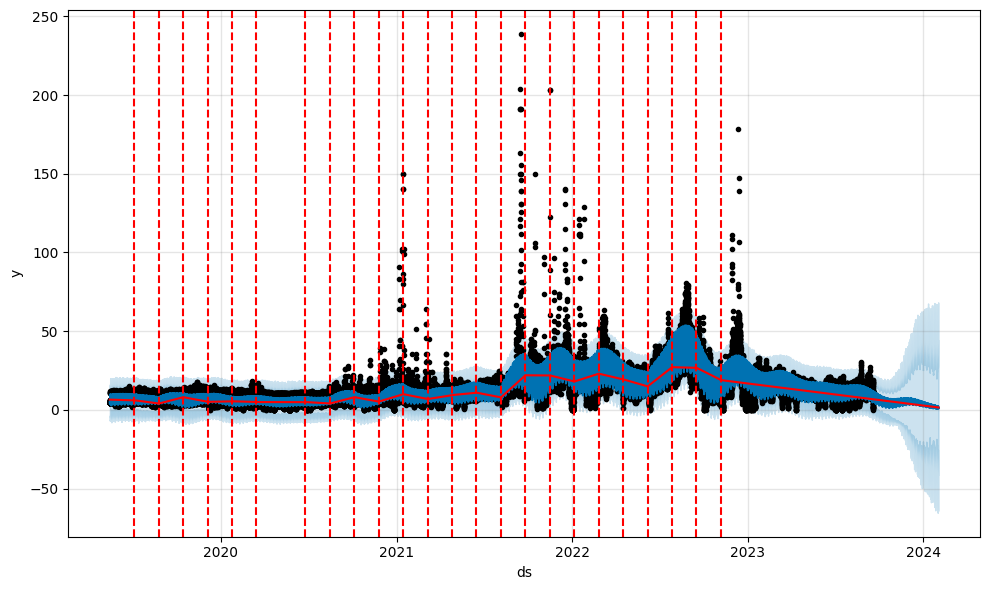

In [59]:
from prophet.plot import add_changepoints_to_plot

ax = model.plot(forecast)
# m = Prophet(changepoint_range=0.9)
a = add_changepoints_to_plot(ax.gca(), model, forecast)

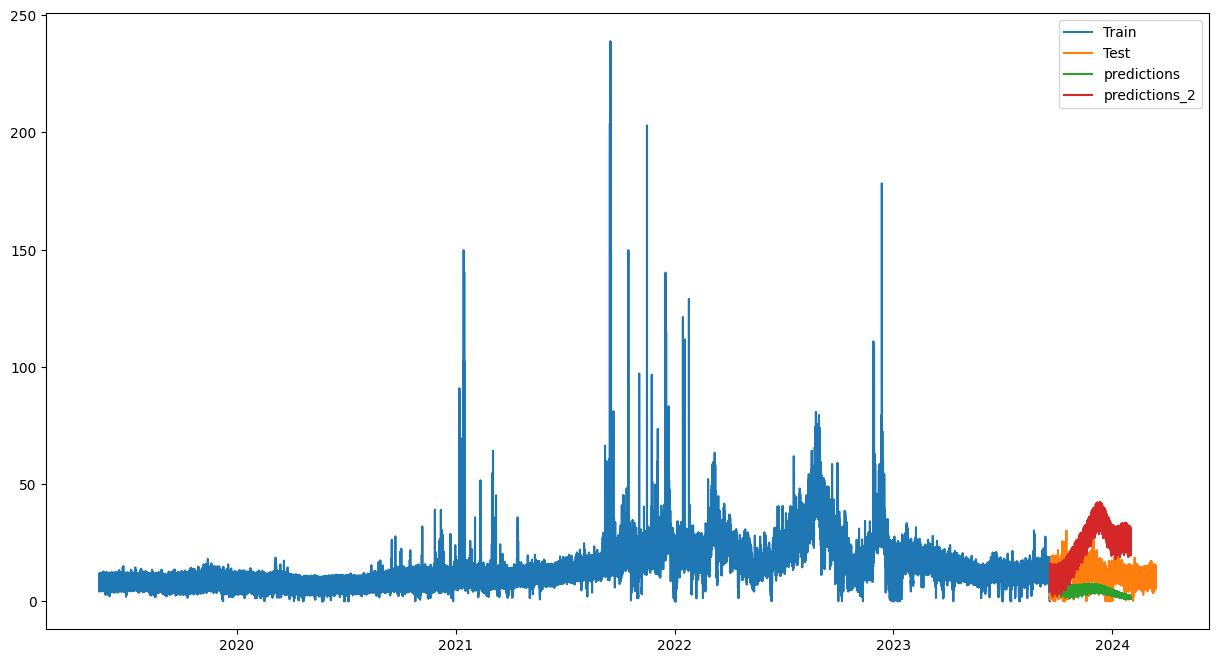

In [60]:
plt.figure(figsize=(15,8))
plt.plot(train['ds'], train['y'], label='Train')
plt.plot(test['ds'], test['y'], label='Test')
plt.plot(forecast[-horizon:]['ds'], forecast[-horizon:]['yhat'], label='predictions')
plt.plot(forecast[-horizon:]['ds'], forecast2[-horizon:]['yhat'], label='predictions_2')
plt.legend(loc='best')
plt.show()

In [61]:
df.shape

(84671, 2)

In [62]:
from datetime import timedelta
# train['ds'][0] - train['ds'][len(train)-1], train['ds'][0], train['ds'][0]+ timedelta(days=1)

train.tail()

,ds,y
76199,2023-09-19 11:00:00,10.01
76200,2023-09-19 11:30:00,9.85
76201,2023-09-19 12:00:00,9.15
76202,2023-09-19 12:30:00,8.62
76203,2023-09-19 13:00:00,8.69


In [63]:
forecast['ds'].tail()

82679   2024-02-01 11:00:00
82680   2024-02-01 11:30:00
82681   2024-02-01 12:00:00
82682   2024-02-01 12:30:00
82683   2024-02-01 13:00:00
Name: ds, dtype: datetime64[ns]

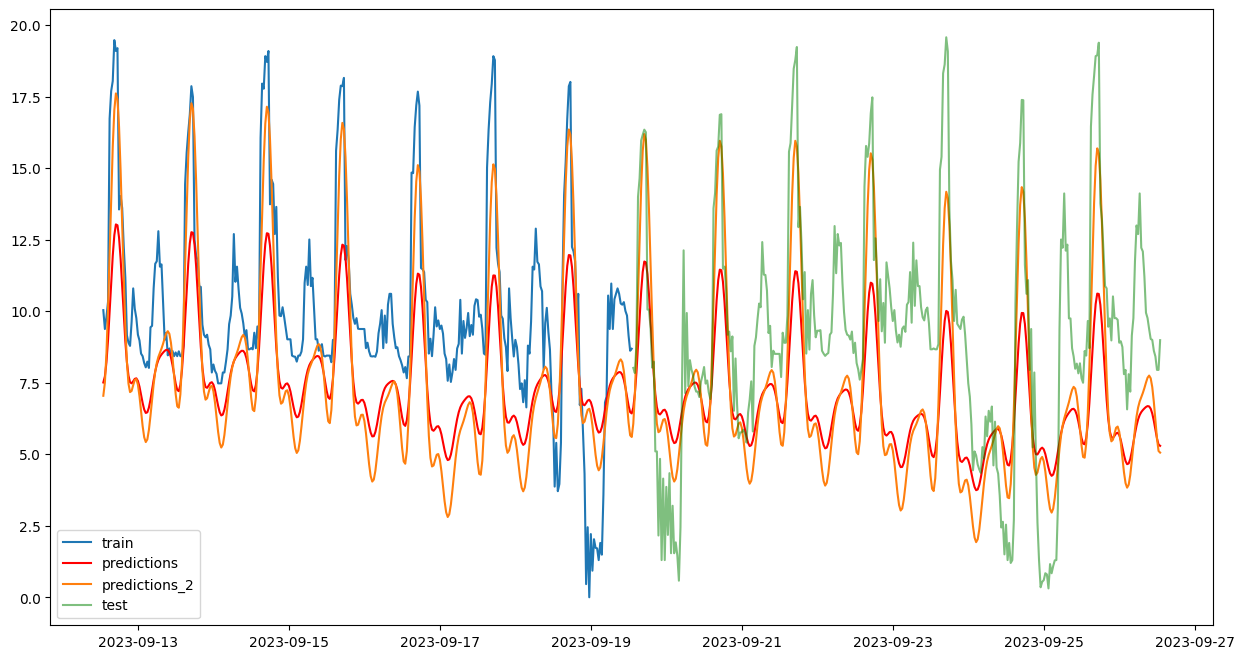

In [64]:
days =7

date = train['ds'][train.index[-1]]- timedelta(days=days)
date_end = date + timedelta(days=days+7)
# date
train_date=train.loc[train['ds'] >= date ].copy()
forecast_date=forecast.loc[(forecast['ds'] >= date ) & (forecast['ds'] <= date_end)].copy()
forecast_date2=forecast2.loc[(forecast2['ds'] >= date ) & (forecast2['ds'] <= date_end)].copy()
test_date=test.loc[test['ds'] <= date_end ].copy()

# train_date.head()
plt.figure(figsize=(15,8))
plt.plot(train_date['ds'], train_date['y'], label='train')
plt.plot(forecast_date['ds'], forecast_date['yhat'], label='predictions', color = 'red')
plt.plot(forecast_date2['ds'], forecast_date2['yhat'], label='predictions_2')
plt.plot(test_date['ds'], test_date['y'], label='test', color = 'green', alpha =0.5)
plt.legend(loc='best')

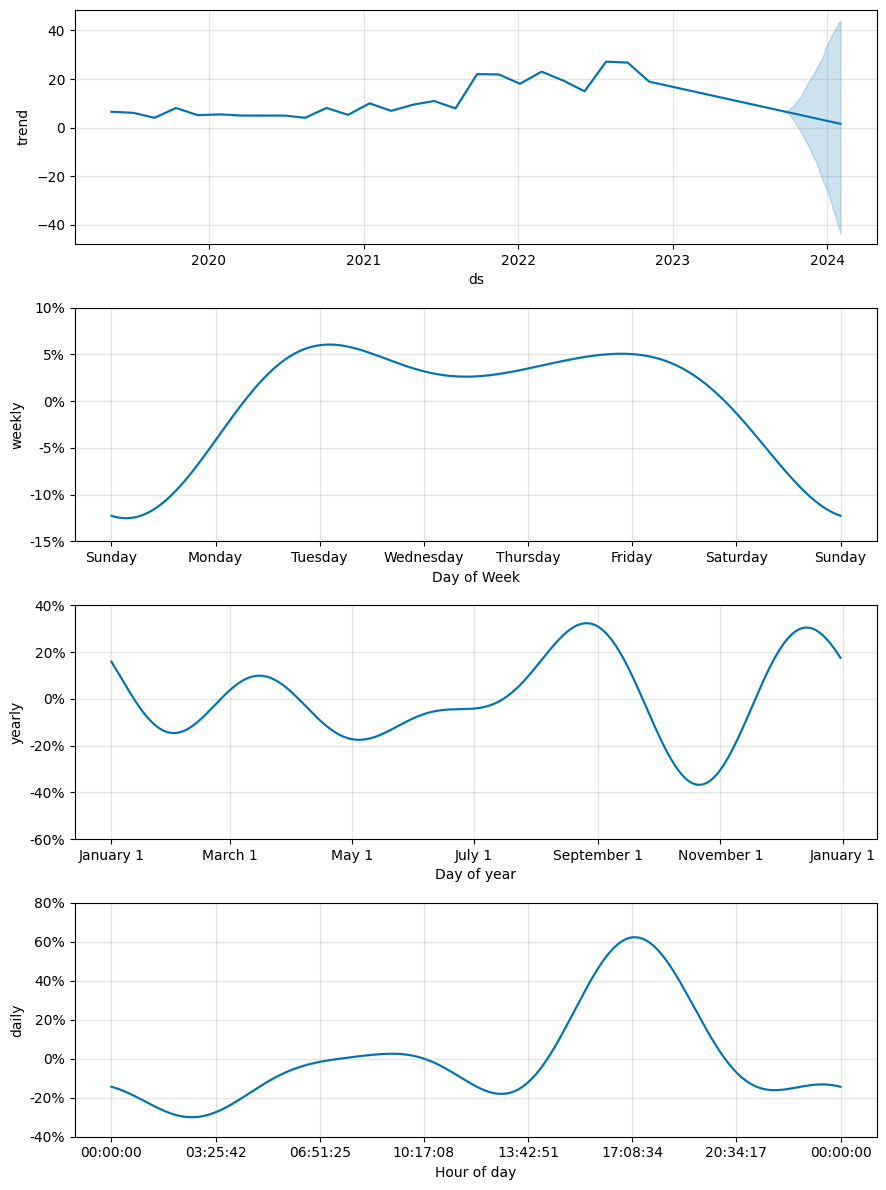

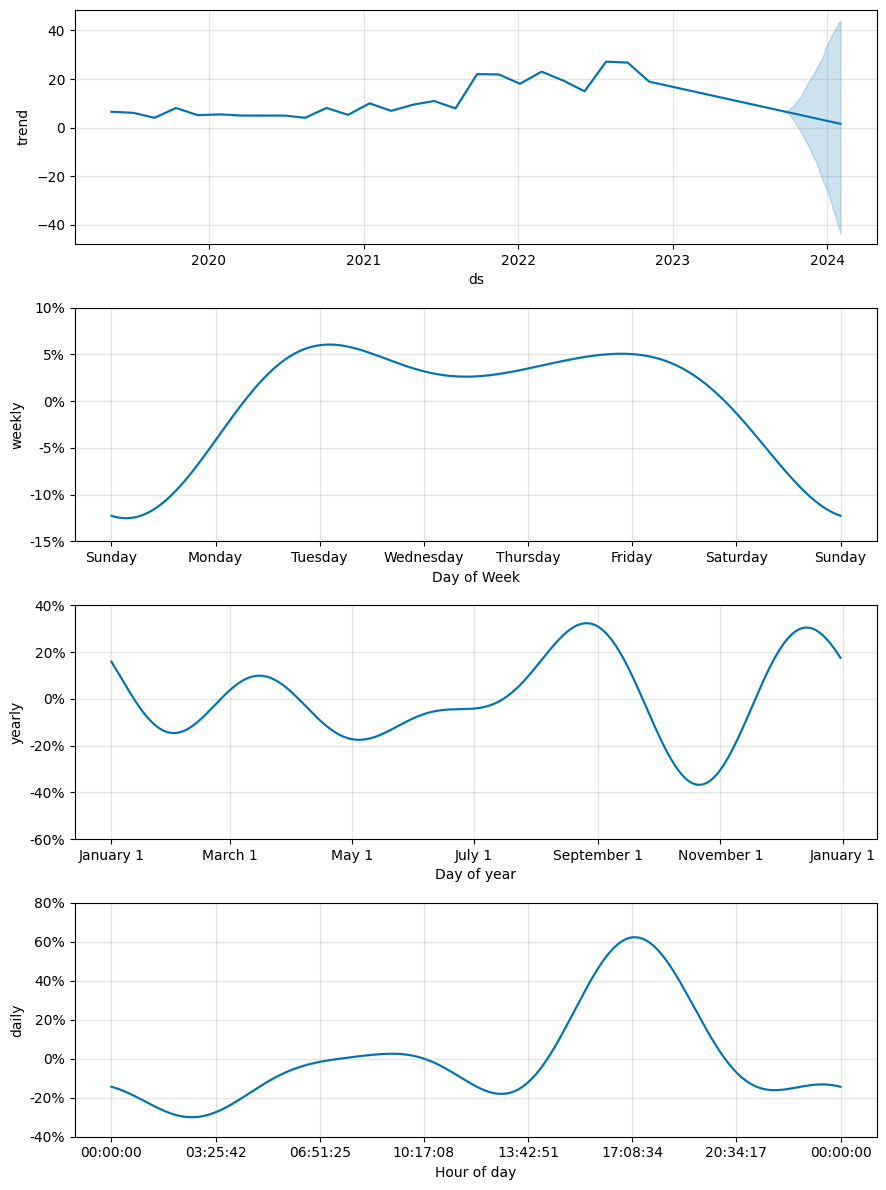

In [65]:
model.plot_components(forecast)

In [66]:
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit

In [71]:
df

,ds,y
0,2019-05-15 23:30:00,4.24
1,2019-05-16 00:00:00,4.24
2,2019-05-16 00:30:00,4.24
3,2019-05-16 01:00:00,4.24
4,2019-05-16 01:30:00,4.24
...,...,...
84666,2024-03-13 20:30:00,6.80
84667,2024-03-13 21:00:00,7.57
84668,2024-03-13 21:30:00,7.08
84669,2024-03-13 22:00:00,6.52


In [82]:
df_index = df.copy()
df_index = df_index.set_index('ds', drop=False)
df_index

,ds,y
ds,,
2019-05-15 23:30:00,2019-05-15 23:30:00,4.24
2019-05-16 00:00:00,2019-05-16 00:00:00,4.24
2019-05-16 00:30:00,2019-05-16 00:30:00,4.24
2019-05-16 01:00:00,2019-05-16 01:00:00,4.24
2019-05-16 01:30:00,2019-05-16 01:30:00,4.24
...,...,...
2024-03-13 20:30:00,2024-03-13 20:30:00,6.80
2024-03-13 21:00:00,2024-03-13 21:00:00,7.57
2024-03-13 21:30:00,2024-03-13 21:30:00,7.08


In [81]:
date1=df['ds'][len(df)-1] - timedelta(days=365)
df['ds'][len(df)-1] - df['ds'][0], df['ds'][round(len(df)/2)], (df['ds'][len(df)-1] - timedelta(days=365)), date1

(Timedelta('1763 days 23:00:00'),
 Timestamp('2021-10-13 23:30:00'),
 Timestamp('2023-03-14 22:30:00'),
 Timestamp('2023-03-14 22:30:00'))

In [83]:
(df_index['ds'][len(df_index)-1] - timedelta(days=365))

Timestamp('2023-03-14 22:30:00')

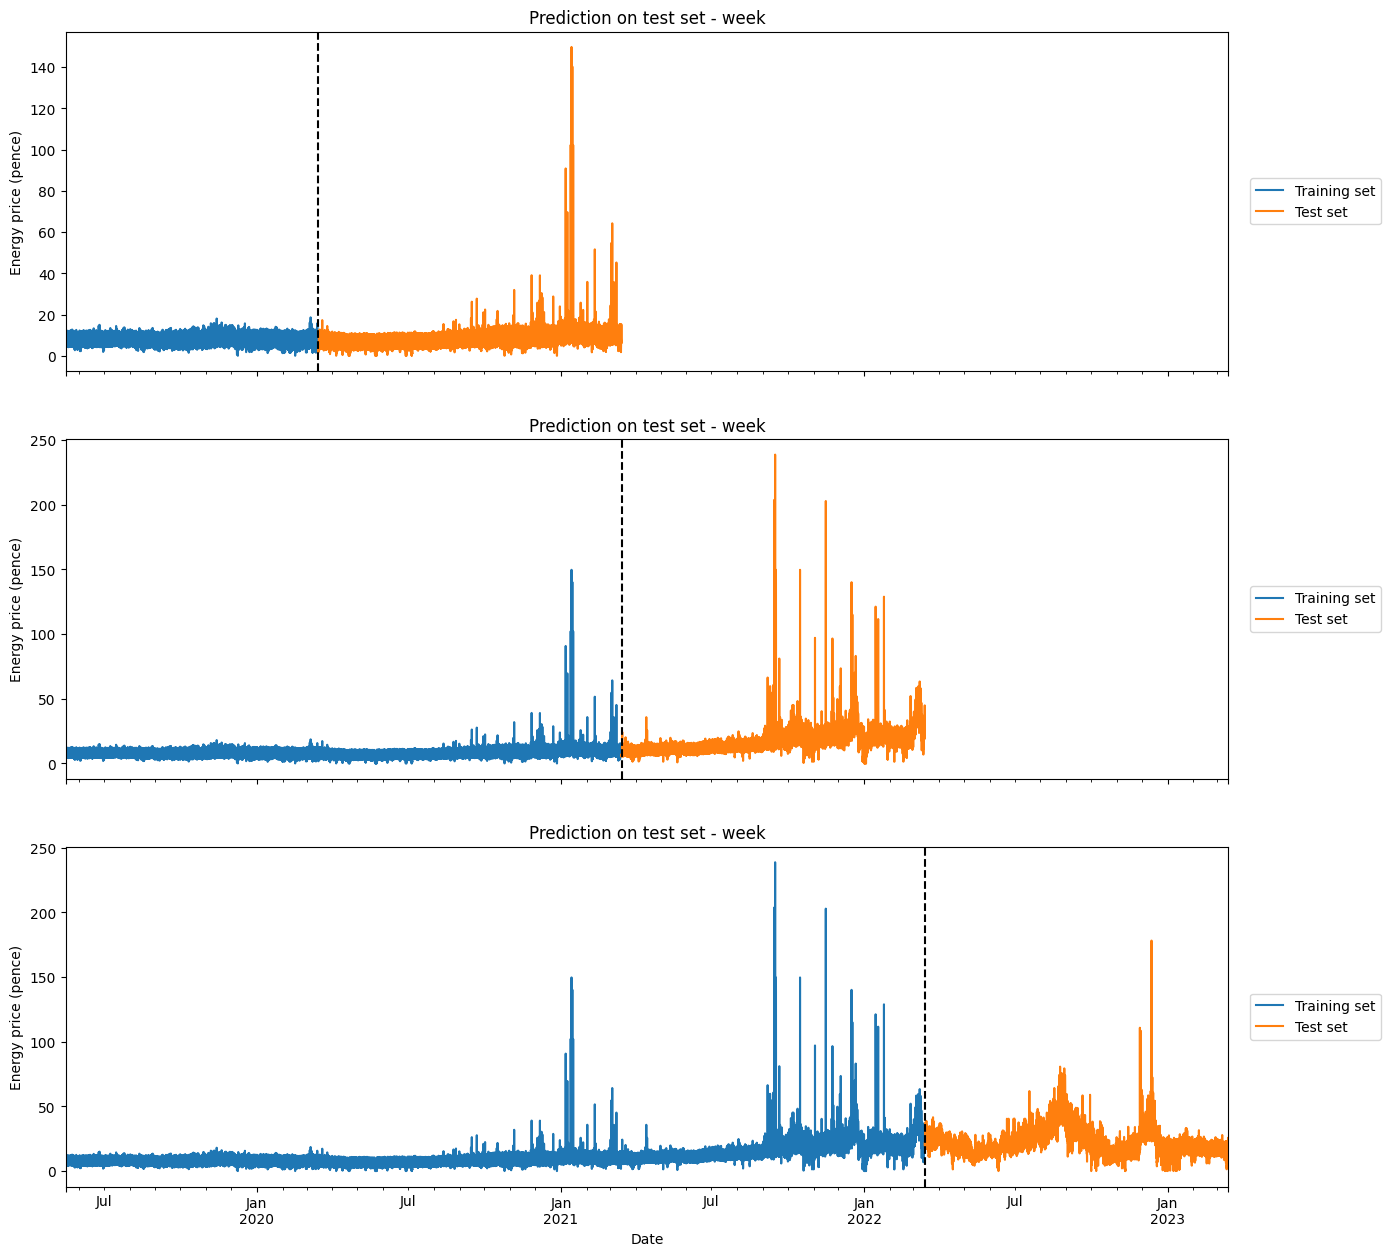

In [84]:
n_years_test = 1
tss = TimeSeriesSplit(n_splits=3, test_size=48 * 365 * n_years_test, gap=48)

fig, axes = plt.subplots(3, 1, figsize=(15, 15), sharex=True)

threshold_date_1 = (df_index['ds'][len(df_index)-1] - timedelta(days=365))

fold = 0
for train_index, test_index in tss.split(df_index[df_index.index<threshold_date_1]):

    train = df_index.iloc[train_index]
    test = df_index.iloc[test_index]

    train["y"].plot(
        ax=axes[fold], label="Training set", title=f"Data Train-test split fold {fold}",
    )
    test["y"].plot(ax=axes[fold], label="Test set")
    axes[fold].axvline(test.index.min(), color="k", ls="--")
    axes[fold].legend(loc="center", bbox_to_anchor=(1.075, 0.5))

    axes[fold].set_title("Prediction on test set - week")
    axes[fold].set_ylabel("Energy price (pence)")
    axes[fold].set_xlabel("Date");
    fold += 1

In [86]:
import itertools

In [88]:
n_years_test = 1
tss_prophet = TimeSeriesSplit(n_splits=3, test_size=48 * 365 * n_years_test, gap=48)

In [90]:
# threshold_date_1 = "06-01-2019"
# threshold_date_2 = "06-01-2021"
threshold_date_1


Timestamp('2023-03-14 22:30:00')

In [91]:
y_train = df_index.loc[df_index.index < threshold_date_1]
y_test = df_index.loc[(df_index.index >= threshold_date_1)] #& (df.index < threshold_date_2)]

In [95]:
from sklearn.metrics import mean_squared_error

In [96]:
%%time

# Define the parameter grid for the Prophet model
param_grid = {"changepoint_prior_scale": [0.05, 0.1], "seasonality_prior_scale": [2.5, 4 , 8]}

# Create all possible combinations of the parameter grid
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]

rmse_cv_gs = []

for params in all_params:
    rmse_cv = []

    for train_index, test_index in tss_prophet.split(df_index[df_index.index<threshold_date_1]):
        train_data = y_train.iloc[train_index]

        test_data = y_train.iloc[test_index]

        model = Prophet(**params)
        model.fit(train_data)

        prediction = model.predict(test_data)
        mse_val = mean_squared_error(test_data["y"], prediction["yhat"])
        rmse_cv.append(np.sqrt(mse_val))

    rmse_cv_gs.append(np.mean(rmse_cv))

grid_search_results = pd.DataFrame(all_params)
grid_search_results['rmse'] = rmse_cv_gs

grid_search_results

18:31:33 - cmdstanpy - INFO - Chain [1] start processing
18:31:34 - cmdstanpy - INFO - Chain [1] done processing
18:31:38 - cmdstanpy - INFO - Chain [1] start processing
18:31:42 - cmdstanpy - INFO - Chain [1] done processing
18:31:47 - cmdstanpy - INFO - Chain [1] start processing
18:32:07 - cmdstanpy - INFO - Chain [1] done processing
18:32:10 - cmdstanpy - INFO - Chain [1] start processing
18:32:11 - cmdstanpy - INFO - Chain [1] done processing
18:32:15 - cmdstanpy - INFO - Chain [1] start processing
18:32:18 - cmdstanpy - INFO - Chain [1] done processing
18:32:24 - cmdstanpy - INFO - Chain [1] start processing
18:32:40 - cmdstanpy - INFO - Chain [1] done processing
18:32:43 - cmdstanpy - INFO - Chain [1] start processing
18:32:44 - cmdstanpy - INFO - Chain [1] done processing
18:32:48 - cmdstanpy - INFO - Chain [1] start processing
18:32:51 - cmdstanpy - INFO - Chain [1] done processing
18:32:56 - cmdstanpy - INFO - Chain [1] start processing
18:33:17 - cmdstanpy - INFO - Chain [1]

CPU times: user 1min 16s, sys: 40.7 s, total: 1min 57s
Wall time: 3min 32s


,changepoint_prior_scale,seasonality_prior_scale,rmse
0,0.05,2.5,20.383997
1,0.05,4.0,18.970847
2,0.05,8.0,19.310625
3,0.10,2.5,20.653380
4,0.10,4.0,20.478594
5,0.10,8.0,19.531166


In [97]:
best_params = all_params[np.argmin(rmse_cv_gs)]
print(best_params)

{'changepoint_prior_scale': 0.05, 'seasonality_prior_scale': 4}


In [98]:
def mean_absolute_percentage_error(y_true, y_pred):
    """
    Calculate Mean Absolute Pertange Error given the true and
    predicted values

    Args:
        - y_true: true values
        - y_pred: predicted values

    Returns:
        - mape: MAPE value for the given predicted values
    """

    y_true, y_pred = np.array(y_true), np.array(y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return mape

In [104]:
y_test.describe()

,y
count,17521.000000
mean,9.756482
std,3.729065
min,0.000000
25%,7.660000
50%,9.250000
75%,11.310000
max,30.960000


In [105]:
prophet_best_predict_df.describe()

,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
count,17521.000000,17521.000000,17521.000000,17521.000000,17521.000000,17521.000000,17521.000000,17521.000000,17521.000000,17521.000000,...,17521.000000,17521.000000,17521.000000,17521.000000,17521.000000,17521.000000,17521.0,17521.0,17521.0,17521.000000
mean,27.126373,-60.790172,124.998216,-59.600563,123.528834,0.005970,0.005970,0.005970,-0.000111,-0.000111,...,0.001066,0.001066,0.001066,0.005015,0.005015,0.005015,0.0,0.0,0.0,27.132343
std,2.699352,69.660090,78.800182,68.737677,81.083766,8.853485,8.853485,8.853485,3.332281,3.332281,...,0.671784,0.671784,0.671784,8.175819,8.175819,8.175819,0.0,0.0,0.0,9.145700
min,22.451359,-221.682469,15.156318,-209.220859,22.451359,-14.672489,-14.672489,-14.672489,-3.865676,-3.865676,...,-1.402124,-1.402124,-1.402124,-9.595073,-9.595073,-9.595073,0.0,0.0,0.0,8.230909
25%,24.788866,-109.680410,52.827984,-112.952397,50.874269,-7.497114,-7.497114,-7.497114,-2.185231,-2.185231,...,-0.477219,-0.477219,-0.477219,-7.163196,-7.163196,-7.163196,0.0,0.0,0.0,20.931371
50%,27.126373,-33.877626,117.162404,-44.627862,106.982013,-1.795414,-1.795414,-1.795414,-1.111019,-1.111019,...,0.368245,0.368245,0.368245,-2.901049,-2.901049,-2.901049,0.0,0.0,0.0,26.116120
75%,29.463880,1.951226,193.899788,3.703028,188.962994,6.109041,6.109041,6.109041,0.296544,0.296544,...,0.491489,0.491489,0.491489,5.206260,5.206260,5.206260,0.0,0.0,0.0,33.680950
max,31.801387,16.798523,294.453374,22.834539,288.212923,25.639913,25.639913,25.639913,8.545334,8.545334,...,0.671192,0.671192,0.671192,16.571567,16.571567,16.571567,0.0,0.0,0.0,52.184328


In [103]:
# Create Prophet using the best parameters from the grid search
prophet_best = Prophet(**best_params)
prophet_best.fit(y_train)

prophet_best_predict_df = prophet_best.predict(y_test)

# Compute MAPE value
mape_prophet_cv_gs = mean_absolute_percentage_error(
    y_test['y'], prophet_best_predict_df["yhat"]
)
rmse_prophet_cv_gs = np.sqrt(
    mean_squared_error(y_test['y'], prophet_best_predict_df["yhat"])
)
print(
    "Mean Absolute Percentage Error of the best-parameters Prophet model is: %.2f"
    % mape_prophet_cv_gs
)
print(
    "Root Mean Squared Error of the Prophet (with cross-validation) model is: %.2f " % rmse_prophet_cv_gs
)

18:44:07 - cmdstanpy - INFO - Chain [1] start processing
18:44:45 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error of the best-parameters Prophet model is: inf
Root Mean Squared Error of the Prophet (with cross-validation) model is: 19.71 


/tmp/ipykernel_387217/2930868127.py:15: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100


In [65]:
model

In [66]:
df_cv = cross_validation(model = model, initial='180 days', horizon='30 days', period='3 days')

df_p = performance_metrics(df_cv)

Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.
  0%|          | 0/171 [00:00<?, ?it/s]22:13:50 - cmdstanpy - INFO - Chain [1] start processing
22:13:54 - cmdstanpy - INFO - Chain [1] done processing
  1%|          | 1/171 [00:04<12:10,  4.29s/it]22:13:54 - cmdstanpy - INFO - Chain [1] start processing
22:14:00 - cmdstanpy - INFO - Chain [1] done processing
  1%|          | 2/171 [00:10<15:22,  5.46s/it]22:14:00 - cmdstanpy - INFO - Chain [1] start processing
22:14:04 - cmdstanpy - INFO - Chain [1] done processing
  2%|▏         | 3/171 [00:14<13:16,  4.74s/it]22:14:04 - cmdstanpy - INFO - Chain [1] start processing
22:14:07 - cmdstanpy - INFO - Chain [1] done processing
  2%|▏         | 4/171 [00:17<11:48,  4.24s/it]22:14:08 - cmdstanpy - INFO - Chain [1] start processing
22:14:12 - cmdstanpy - INFO - Chain [1] done processing
  3%|▎         | 5/171 [00:22<11:52,  4.29s/it]22:14:12 - cmdstanpy - INFO - Chain [1] start processing


In [67]:
df_p

,horizon,mse,rmse,mae,mdape,smape,coverage
0,3 days 00:00:00,39.555375,6.289306,4.077339,0.192147,0.280413,0.910210
1,3 days 00:30:00,39.732184,6.303347,4.085873,0.192537,0.280779,0.909925
2,3 days 01:00:00,39.969970,6.322181,4.095333,0.192720,0.281130,0.909438
3,3 days 01:30:00,40.204310,6.340687,4.103939,0.192950,0.281462,0.908951
4,3 days 02:00:00,40.437510,6.359049,4.112552,0.193157,0.281782,0.908423
...,...,...,...,...,...,...,...
1292,29 days 22:00:00,843.862444,29.049311,15.032215,0.504166,0.823552,0.878330
1293,29 days 22:30:00,845.269248,29.073515,15.039941,0.504166,0.823733,0.878330
1294,29 days 23:00:00,846.651810,29.097282,15.048116,0.504166,0.823999,0.878452
1295,29 days 23:30:00,848.064778,29.121552,15.056599,0.504243,0.824245,0.878614


In [68]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2022-07-02 16:00:00,26.280225,17.246715,35.232057,26.08,2022-07-02 15:30:00
1,2022-07-02 16:30:00,28.400742,19.739222,37.070484,26.80,2022-07-02 15:30:00
2,2022-07-02 17:00:00,29.800512,21.401965,38.408744,26.69,2022-07-02 15:30:00
3,2022-07-02 17:30:00,30.246189,21.506550,39.070852,27.18,2022-07-02 15:30:00
4,2022-07-02 18:00:00,29.660586,21.310643,38.474737,21.63,2022-07-02 15:30:00


In [69]:
df_cv.tail()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
246235,2023-12-24 13:30:00,12.424560,-5.072115,31.755679,1.40,2023-11-24 15:30:00
246236,2023-12-24 14:00:00,13.475991,-5.412427,34.605448,1.54,2023-11-24 15:30:00
246237,2023-12-24 14:30:00,15.020395,-5.711903,38.883282,1.46,2023-11-24 15:30:00
246238,2023-12-24 15:00:00,16.918027,-5.780250,43.310954,2.13,2023-11-24 15:30:00
246239,2023-12-24 15:30:00,18.945641,-7.526662,48.887994,2.97,2023-11-24 15:30:00


/home/rahuliyer/.pyenv/versions/3.11.6/envs/market/lib/python3.11/site-packages/prophet/plot.py:546: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])
/home/rahuliyer/.pyenv/versions/3.11.6/envs/market/lib/python3.11/site-packages/prophet/plot.py:547: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])


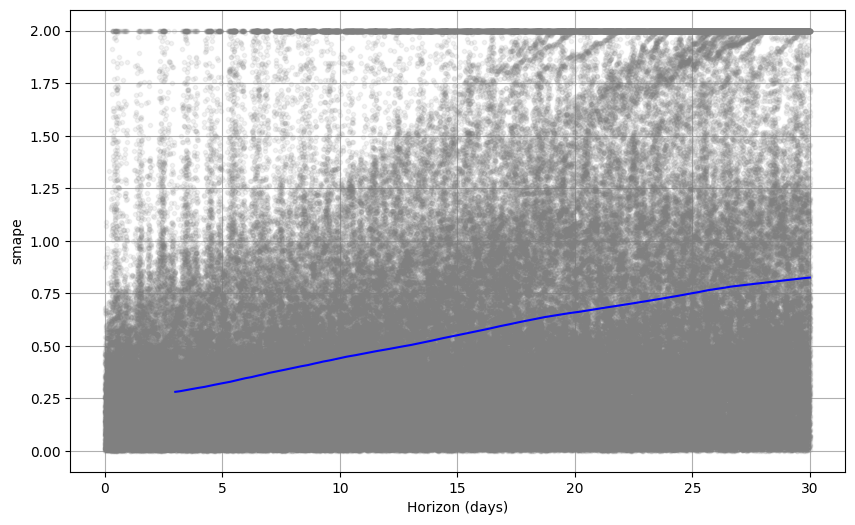

In [70]:
plot_cross_validation_metric(df_cv, metric='smape');

In [35]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [36]:
df.head()

,ds,y
63650,2023-01-01 00:30:00,7.29
63651,2023-01-01 01:00:00,7.95
63652,2023-01-01 01:30:00,1.78
63653,2023-01-01 02:00:00,4.19
63654,2023-01-01 02:30:00,1.88


In [37]:
df_index=df.copy()
df_index.set_index('ds', inplace=True)

In [38]:
df_index.head()

,y
ds,
2023-01-01 00:30:00,7.29
2023-01-01 01:00:00,7.95
2023-01-01 01:30:00,1.78
2023-01-01 02:00:00,4.19
2023-01-01 02:30:00,1.88


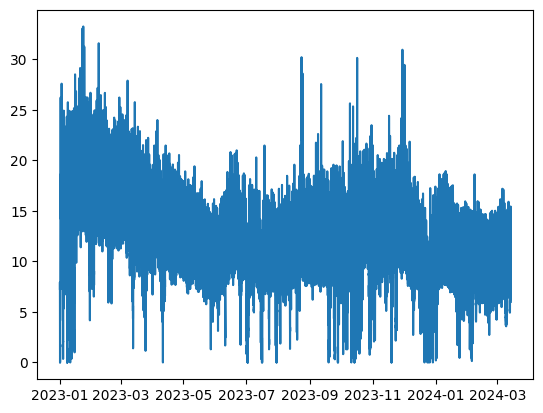

In [39]:
plt.plot(df_index)

# plt.plot(

# df['ds']['2019']

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21021 entries, 63650 to 84670
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      21021 non-null  datetime64[ns]
 1   y       21021 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 492.7 KB


In [41]:
date1 = df_index.index[0]
date1

Timestamp('2023-01-01 00:30:00')

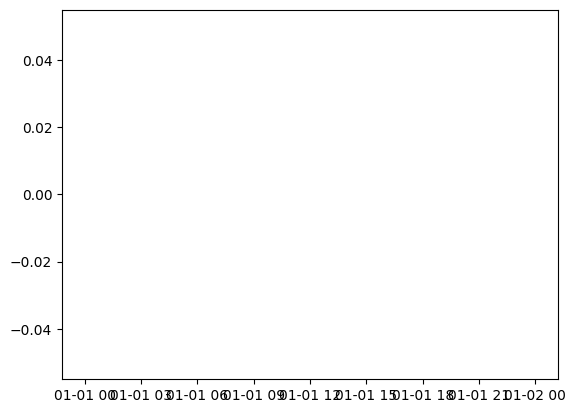

In [42]:
date = '2019-06-01'

df_date=df_index.loc[df_index.index <= date ].copy()
plt.plot(df_date)


# df_date.tail()

# df_index.set_index('ds', inplace=True)

In [43]:
Prophet(growth = 'linear', changepoints = None, n_changepoints= 25, changepoint_range= 0.8, yearly_seasonality= 'auto', weekly_seasonality= 'auto',
        daily_seasonality= 'auto', holidays: Any | None = None, seasonality_mode: str = 'additive', seasonality_prior_scale: float = 10, holidays_prior_scale: float = 10,
        changepoint_prior_scale: float = 0.05, mcmc_samples: int = 0, interval_width: float = 0.8, uncertainty_samples: int = 1000, stan_backend: Any | None = None,
        scaling: str = 'absmax', holidays_mode: Any | None = None)

SyntaxError: positional argument follows keyword argument (1082694179.py, line 2)

In [ ]:
df_index.index = pd.to_datetime(df_index.index)
df_index = df_index.asfreq('30T')


In [ ]:
# Now, you can run seasonal decomposition
result_add = seasonal_decompose(df_index['y'], model='additive')
result_add.plot();